<a href="https://colab.research.google.com/github/Pushkarkv/Advanced-Tensorflow/blob/main/Multi_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot

In [3]:
def format_output(data):
  y1=data.pop('Y1')
  y1=np.array(y1)
  y2=data.pop('Y2')
  y2=np.array(y2)
  return y1, y2

In [4]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

In [5]:
def plot_diff(y_true, y_pred, title=''):
  plt.scatter(y_true, y_pred)
  plt.title(title)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100,100],[-100,100])
  plt.show()

In [6]:
def plot_metrics(metric_name,title,ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name], color='blue', label=metric_name)
  plt.plot(history.history['val_'+ metric_name], color='green', label='val_'+ metric_name)
  plt.show()

In [7]:
URL='https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
df=pd.read_excel(URL)
df=df.sample(frac=1).reset_index(drop=True)

In [8]:
train, test = train_test_split(df,test_size=0.2)
train_stats=train.describe()

In [9]:
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats=train_stats.transpose()
train_Y=format_output(train)
test_Y=format_output(test)

In [10]:
norm_train_X=norm(train)
norm_test_X=norm(test)

In [11]:
input_layer=Input(shape=len(train.columns,))
first_dense=Dense(units='128', activation='relu')(input_layer)
second_dense=Dense(units='128', activation='relu')(first_dense)
y1_output=Dense(units='1', name='y1_output')(second_dense)
third_dense=Dense(units='64', activation='relu')(second_dense)
y2_output=Dense(units='1', name='y2_output')(third_dense)
model=Model(inputs=input_layer, outputs=[y1_output, y2_output])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

In [12]:
optimizer=tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

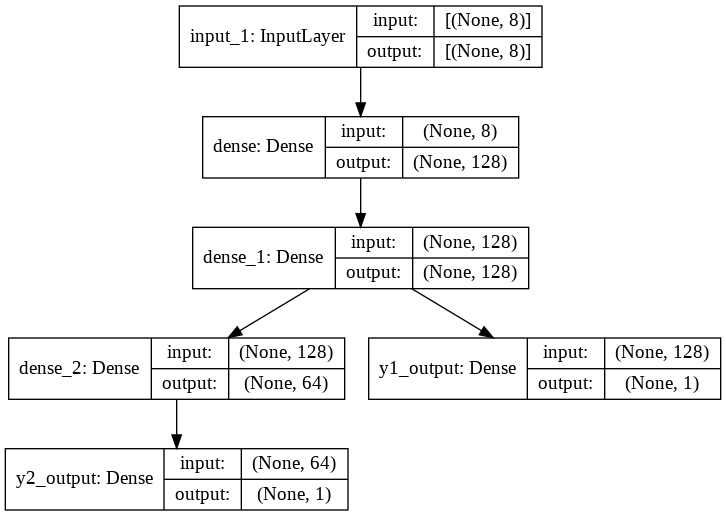

In [13]:
'''from tensorflow.keras.layers import Layer
model._layers=[layer for layer in model._layers if isinstance(layer, Layer)]'''
plot_model(model)
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [14]:
history=model.fit(norm_train_X, train_Y, epochs=2000, batch_size=10, validation_data=(norm_test_X, test_Y))

loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse= model.evaluate(x=norm_test_X, y=test_Y)
print('Loss= {}, Y1_loss= {}, Y1_mse= {}, Y2_loss= {}, Y2_mse= {}'.format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

Epoch 1/2000
62/62 [==============================] - 1s 12ms/step - loss: 581.9434 - y1_output_loss: 279.0711 - y2_output_loss: 302.8722 - y1_output_root_mean_squared_error: 16.0393 - y2_output_root_mean_squared_error: 16.6224 - val_loss: 37.3022 - val_y1_output_loss: 14.4732 - val_y2_output_loss: 22.8290 - val_y1_output_root_mean_squared_error: 3.8044 - val_y2_output_root_mean_squared_error: 4.7780
Epoch 2/2000
62/62 [==============================] - 0s 2ms/step - loss: 45.1681 - y1_output_loss: 14.7448 - y2_output_loss: 30.4232 - y1_output_root_mean_squared_error: 3.8233 - y2_output_root_mean_squared_error: 5.4255 - val_loss: 31.7138 - val_y1_output_loss: 10.3216 - val_y2_output_loss: 21.3923 - val_y1_output_root_mean_squared_error: 3.2127 - val_y2_output_root_mean_squared_error: 4.6252
Epoch 3/2000
62/62 [==============================] - 0s 2ms/step - loss: 25.7647 - y1_output_loss: 10.1026 - y2_output_loss: 15.6621 - y1_output_root_mean_squared_error: 3.1758 - y2_output_root_mea

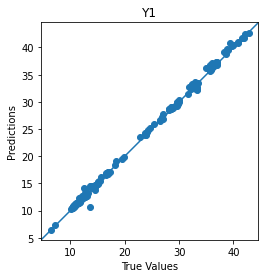

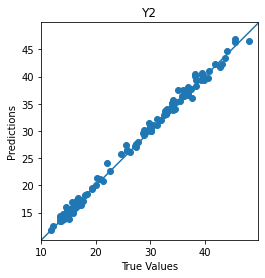

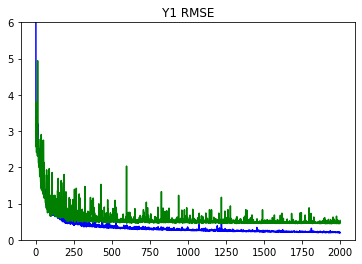

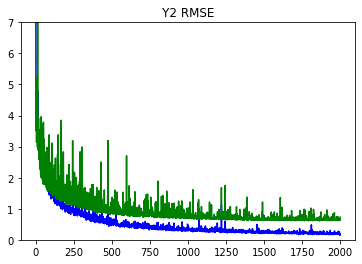

In [16]:
Y_pred=model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title= 'Y1')
plot_diff(test_Y[1], Y_pred[1], title= 'Y2')
plot_metrics(metric_name= 'y1_output_root_mean_squared_error', title= 'Y1 RMSE', ylim=6)
plot_metrics(metric_name= 'y2_output_root_mean_squared_error', title= 'Y2 RMSE', ylim=7)